## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
## <div align="center"> Semester Genap 2022/2023 </div>
### <div align="center"> WEEK [05] : [Regresi dan Induksi Pohon Keputusan] </div>


### Header

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Gempar Bambang Godata"
myNIM = "00000067643"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Gempar Bambang Godata
NIM: 		00000067643
Start: 		2023-03-13 22:20:59.384126
Device ID: 	a882dc70-c1b2-11ed-94c1-c83e35b1a0dc



---

### Dataset yang dipakai:

1. Medical Cost Personal Datasets – sumber : https://www.kaggle.com/datasets/mirichoi0218/insurance
2. Stroke Prediction Dataset – sumber : https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
### Deskripsi Dataset
- Dataset 1: Berisi tentang kondisi fisik pasien pemegang jumlah asuransi dan dikelompokkan berdasarkan region
- Dataset 2: Berisi mengenai faktor-faktor yang menyebabkan stroke

## Hasil kerja (Bukan Modul)
#### Import Libraries

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import warnings

### Simple inear Regression
Generating the datasets with random (106.969 data)

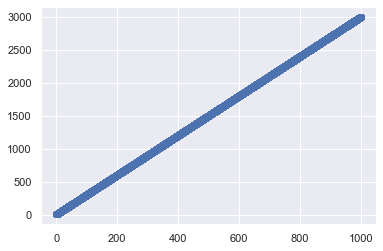

In [3]:
rng = np.random.RandomState(1)
x=1000*rng.rand(106969)
y=3*x+3+rng.randn(106969)
plt.scatter(x,y)

#### Fit the linear regression from the given y = f(x) function

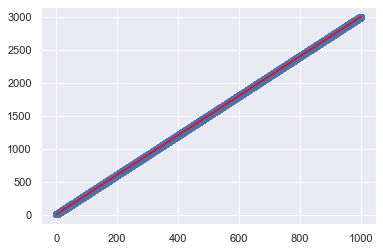

In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 1000, 2000000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red');

In [5]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.999996912135603
Model intercept: 3.0037143608979022


#### Handling multidimensional data (vector 5-dimension)

In [6]:
rng = np.random.RandomState(1)
X = 100 * rng.rand(106969, 5)
y = 1.75 + np.dot(X, [1., -2., 4., -8., 16.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

1.7499999999929514
[ 1. -2.  4. -8. 16.]


### Polynominal Basis Functions

In [7]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 6, 7])
poly = PolynomialFeatures(4, include_bias=False)
poly.fit_transform(x[:, None])

array([[2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

#### Defining regression with Polynomial Basis Function (PolynomialFeatures) with polynomial degree of 7

In [8]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7), LinearRegression())

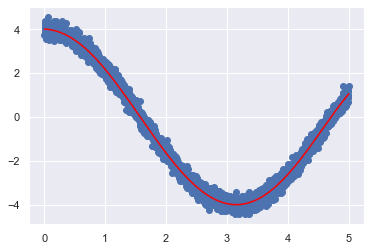

In [9]:
rng = np.random.RandomState(1)
x = 5 * rng.rand(3000)
y = 4 * np.cos(x) + 0.2 * rng.randn(3000)

xfit = np.linspace(0, 5, 292929)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color="red")

### Gaussian Basis Function
#### Gaussian Model Regression and 20 Gaussian Features

(0.0, 5.0)

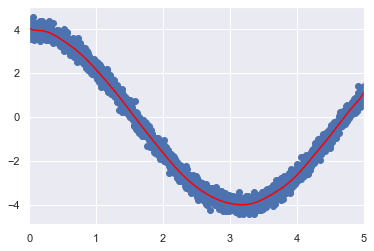

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg**2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit, color='red')
plt.xlim(0, 5)

### Regularization

#### 45 Gaussian Features (Overfitted)

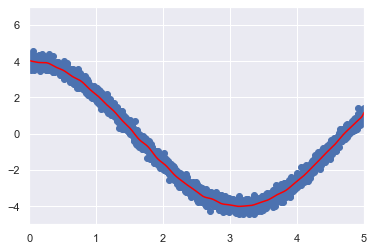

In [11]:
model = make_pipeline(GaussianFeatures(45),
                     LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]), color='red')

plt.xlim(0, 5)
plt.ylim(-5, 7);

#### Regression with the amplitude of the basis function at certain location

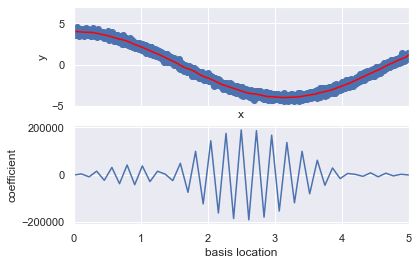

In [12]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]), color='red')
    ax[0].set(xlabel='x', ylabel='y', ylim=(-5, 7))
    
    if title:
        ax[0].set_title(title)
    
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 5))

model = make_pipeline(GaussianFeatures(45), LinearRegression())
basis_plot(model)

### Ridge Regression (L2 regularization)

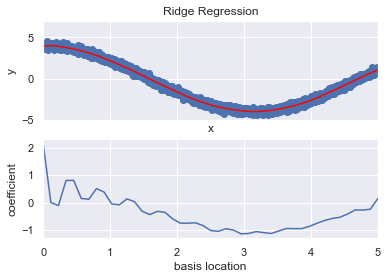

In [13]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(45), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

### Lasso Regression (L1 regularization)

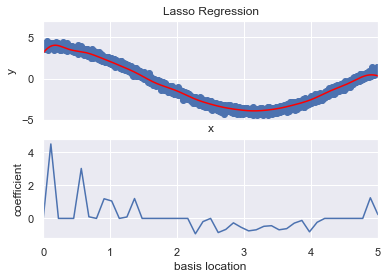

In [14]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(45), Lasso(alpha=0.01))
basis_plot(model, title='Lasso Regression')

### Linear Regression fot Dataset 1: Medical Cost Personal (Insurance)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.utils import resample
import sklearn.datasets
import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
dataset = pd.read_csv('insurance.csv')
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


#### Specifies the column to use and adapts the linear regression model to the data

In [18]:
categorical_col = ['sex', 'children', 'smoker', 'region']
dataset_encode = pd.get_dummies(data=dataset, prefix= 'OHE', prefix_sep='_', columns=categorical_col, drop_first=True, dtype='int8')
dataset_encode

,age,bmi,charges,OHE_male,OHE_1,OHE_2,OHE_3,OHE_4,OHE_5,OHE_yes,OHE_northwest,OHE_southeast,OHE_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,10600.54830,1,0,0,1,0,0,0,1,0,0
1334,18,31.920,2205.98080,0,0,0,0,0,0,0,0,0,0
1335,18,36.850,1629.83350,0,0,0,0,0,0,0,0,1,0
1336,21,25.800,2007.94500,0,0,0,0,0,0,0,0,0,1


In [19]:
x = dataset_encode.iloc[:, [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]
y = dataset_encode.iloc[:, 2]

model= LinearRegression(fit_intercept=False)
model.fit(x, y)
dataset['predicted'] = model.predict(x)

#### The accuracy of the estimated contribution of each feature to the calculation of the predictions made

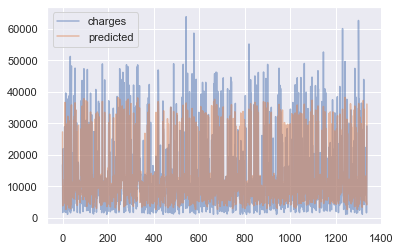

In [20]:
dataset[['charges', 'predicted']].plot(alpha=0.5);

In [21]:
params = pd.Series(model.coef_, index=x.columns)
params

age                204.109282
bmi                 70.079057
OHE_male          -651.134064
OHE_1             -303.611126
OHE_2             1107.420268
OHE_3              493.704759
OHE_4             2459.106292
OHE_5             -125.876188
OHE_yes          23354.726370
OHE_northwest    -1745.183792
OHE_southeast    -1251.395771
OHE_southwest    -1919.237495
dtype: float64

In [22]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(x, y)).coef_ for i in range(1000)], 0)
print(pd.DataFrame({'effect': params.round(0), 
                    'error': err.round(0)}))

                effect   error
age              204.0    12.0
bmi               70.0    20.0
OHE_male        -651.0   352.0
OHE_1           -304.0   426.0
OHE_2           1107.0   556.0
OHE_3            494.0   537.0
OHE_4           2459.0  1519.0
OHE_5           -126.0   831.0
OHE_yes        23355.0   650.0
OHE_northwest  -1745.0   486.0
OHE_southeast  -1251.0   538.0
OHE_southwest  -1919.0   473.0


#### Print the effect and error for each attribute to the price_in_thousands

In [23]:
print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

                effect   error
age              204.0    12.0
bmi               70.0    20.0
OHE_male        -651.0   352.0
OHE_1           -304.0   426.0
OHE_2           1107.0   556.0
OHE_3            494.0   537.0
OHE_4           2459.0  1519.0
OHE_5           -126.0   831.0
OHE_yes        23355.0   650.0
OHE_northwest  -1745.0   486.0
OHE_southeast  -1251.0   538.0
OHE_southwest  -1919.0   473.0


### Decision Trees Learning
Installing libraries

In [21]:
!pip install mglearn 

In [22]:
!pip install scikit-learn==1.1.3

In [23]:
!pip install --upgrade joblib==1.1.0

In [24]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

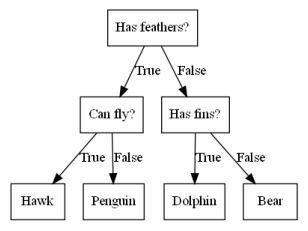

In [25]:
mglearn.plots.plot_animal_tree()

### Building Decision Trees

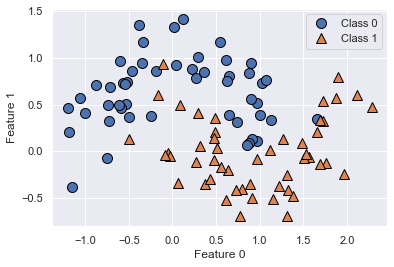

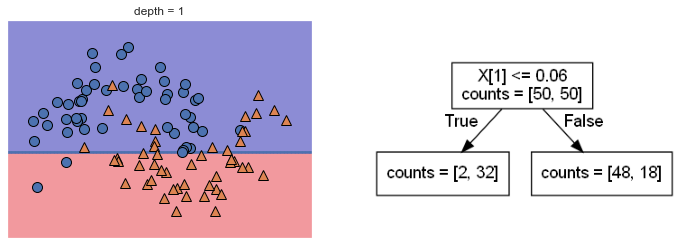

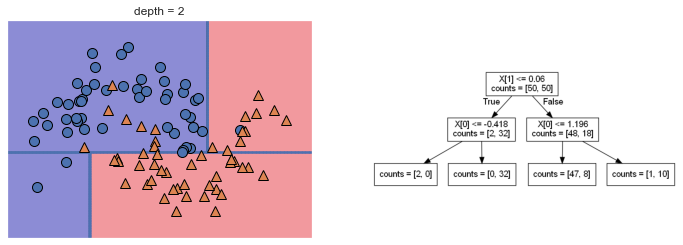

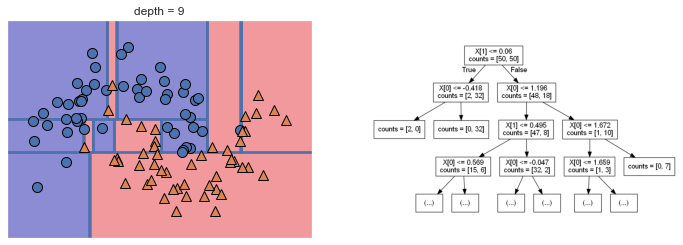

In [26]:
mglearn.plots.plot_tree_progressive()

### Controlling Complexity of Decision Trees (Dataset 2)

In [27]:
strokedataset = pd.read_csv('StrokeData.csv')
strokedataset = strokedataset.drop(columns=['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
strokedataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
1,61.0,0,0,202.21,NaN,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1


In [28]:
# Drop any rows with null values
strokedataset.dropna(axis=0, how='any', inplace=True)
strokedataset.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1


In [29]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
x = strokedataset.iloc[:, :-1].values
y = strokedataset.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test))) 

Accuracy on training set: 1.000
Accuracy on test set: 0.926


In [30]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.981
Accuracy on test set: 0.941


### Analying Decision Trees

In [31]:
from sklearn.tree import export_graphviz
columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']
export_graphviz(tree, out_file="tree.dot",
                feature_names= columns, impurity=False, filled=True)

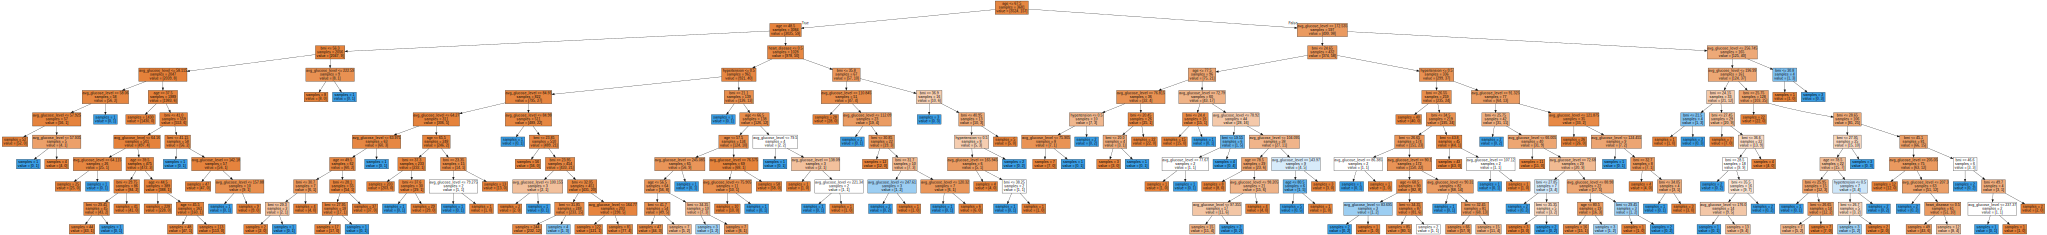

In [32]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance in Trees

In [33]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.19784857 0.0385668  0.01249368 0.37101385 0.3800771 ]


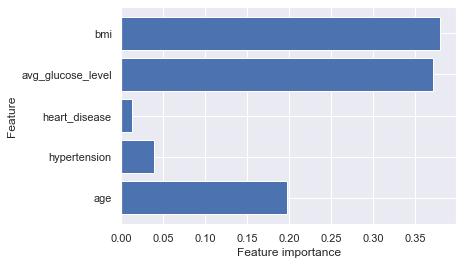

In [34]:
def plot_feature_importances(model):
    n_features = strokedataset.drop(columns=['stroke']).shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(tree)

Feature importances: [0. 1.]


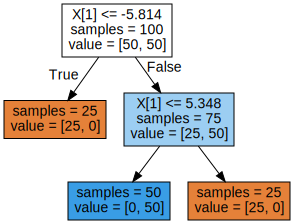

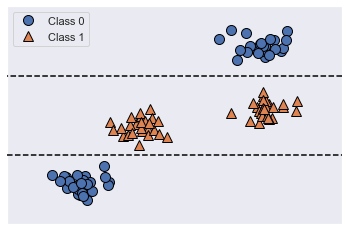

In [35]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'avg_glucose_level')

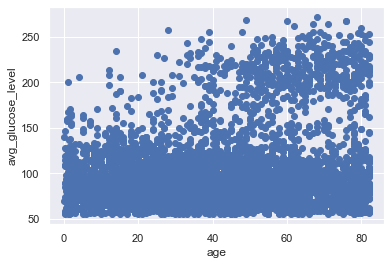

In [45]:
plt.scatter(strokedataset["age"], strokedataset["avg_glucose_level"])
plt.xlabel("age")
plt.ylabel("avg_glucose_level")

### Random Forests

In [52]:
from sklearn.tree import DecisionTreeRegressor

# use historical data to forecast prices after the year 2000
data_train = strokedataset[strokedataset["age"] < 65]
data_test = strokedataset[strokedataset["age"] >= 65]

#predict prices based on date
x_train = np.array(data_train["age"])[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train["avg_glucose_level"])

tree = DecisionTreeRegressor(max_depth=3).fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

# predict on all data
x_all = np.array(strokedataset["age"])[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

# undo Log-transform
maxhr_tree = np.exp(pred_tree)
maxhr_lr = np.exp(pred_lr)

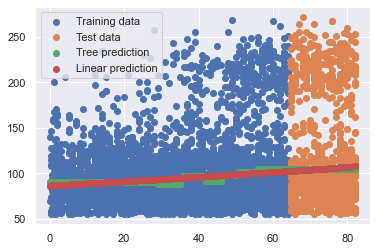

In [53]:
plt.scatter(data_train["age"], data_train["avg_glucose_level"], label="Training data")
plt.scatter(data_test["age"], data_test["avg_glucose_level"], label="Test data")
plt.scatter(strokedataset["age"], maxhr_tree, label="Tree prediction")
plt.scatter(strokedataset["age"], maxhr_lr, label="Linear prediction")
plt.legend()

In [54]:
from sklearn.ensemble import RandomForestClassifier

x, y = strokedataset.iloc[:, [0,2]].values, strokedataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y,
                                                    random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

#### Let’s visualize the decision boundaries learned by each tree, together with their aggregate prediction as made by the forest.

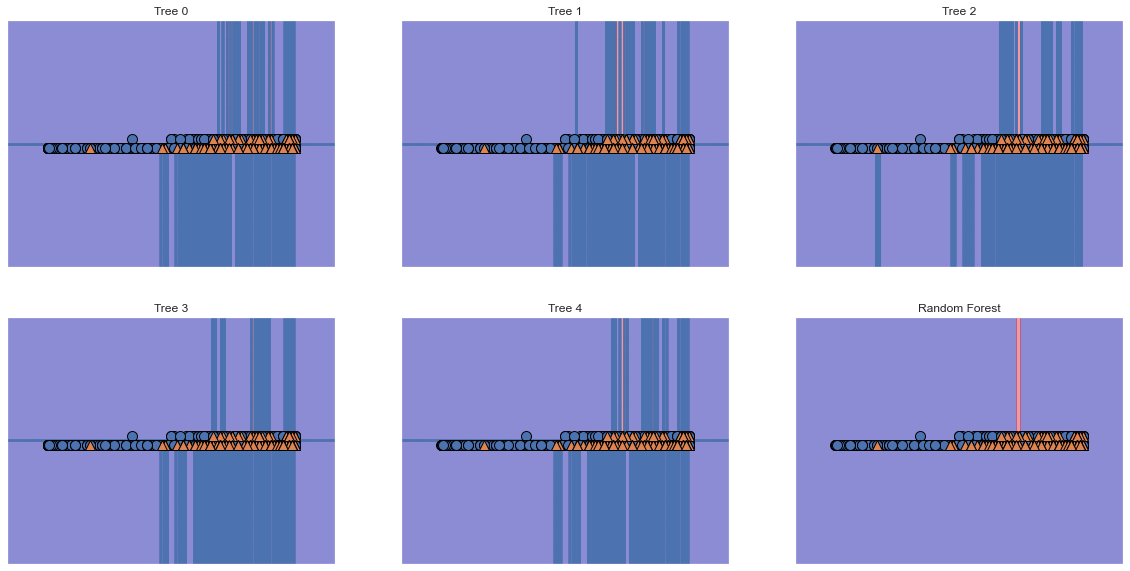

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

#### With dataset mobile price prediction

In [57]:
x, y = strokedataset.iloc[:, 0:-1].values, strokedataset.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    stratify=y, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.953


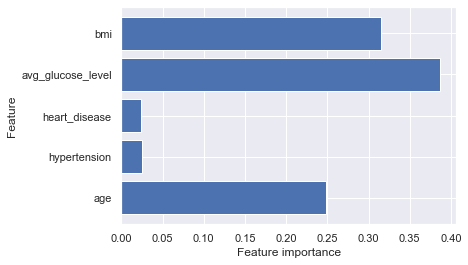

In [58]:
plot_feature_importances(forest)

### Kesimpulan

#### Dataset 1
   - Kita dapat menyimpulkan prediksi jumlah ansuran yang harus dibayarkan oleh pasien dengan metode Simple Linear Regression sudah cukup tepat. Namun tidak akurat dilihat dari banyaknya variabel jumlah charges yang melampaui nilai prediksi. Hal ini dapat disebabkan oleh kondisi kebijakan regional pasien dan golongan pelayanan yang dimilikinya.
           
#### Dataset 2
   - Dalam memprediksi dataset 2 dengan Decision Tree, perlu dilakukan data training and test terlebih dahulu. Didapatkan hasil nilai accuracy training set 5 kolom sebesar 1 dan accuracy testing awal sebesar 0.926    
   - Terdapat pula penggunaan plot tree yang memperlihatkan penyebaran antara class 0 dengan class 1 berada di pusat dan juga berjajar lurus kesamping, dan diketahui bahwa nilai accuracy pada training adalah 1, dengan nilai accuracy test sebesar 0.953
    
   - Dari seluruh decision tree dilakukan lagi plot terhadap feature importances forest, dan didapatkan hasil bahwa tingkat gula darah yang tinggi menjadi faktor penyebab penyakit stroke, diikuti dengan berat badan tidak normal, usia senja, hypertension, dan penyakit jantung bawaan.

In [25]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Gempar Bambang Godata
NIM: 		00000067643
Time-stamp:	2023-03-13 22:31:27.604081
